# The Robert and Rosenbaum Uncertainty Zones model

# An application to EURUSD FX Futures at CME

## Implementation by
## Marcos Costa Santos Carreira (École Polytechnique - CMAP)
## and
## Florian Huchedé (CME)
## Aug-2019

## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import glob

In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
pd.set_option('display.max_rows', 200)

In [4]:
import cme_processing as cme

## File paths and initial values

In [5]:
PATHPROJ = '/Users/marcoscscarreira/Documents/X/CME project/CME_data/'
URL_ROOT = 'https://raw.githubusercontent.com/MarcosCarreira/UZStats/master/CME_data/'

In [6]:
CURR = 'MXN'

In [7]:
PATH_PRIOR = PATHPROJ+CURR+'/prior/'
PATH_AFTER = PATHPROJ+CURR+'/after/'
URL_1 = CURR+'/prior/'
URL_2 = CURR+'/after/'
#PATH_PRIOR = URL_ROOT+URL_1
#PATH_AFTER = URL_ROOT+URL_2

In [8]:
TRADING_HOURS = 8

In [9]:
TICK_PRIOR = 12.5
TICK_AFTER = 5.0

In [10]:
PRIOR_CDATES_LIST = [['6MM4', '20140317'], ['6MM4', '20140318'], ['6MM4', '20140319'],\
    ['6MM4', '20140320'], ['6MM4', '20140321'], ['6MM4', '20140324'], ['6MM4', '20140325'],\
    ['6MM4', '20140326'], ['6MM4', '20140327'], ['6MM4', '20140328'], ['6MM4', '20140331'],\
    ['6MM4', '20140401'], ['6MM4', '20140402'], ['6MM4', '20140403'], ['6MM4', '20140404'],\
    ['6MM4', '20140407'], ['6MM4', '20140408'], ['6MM4', '20140409'], ['6MM4', '20140410'],\
    ['6MM4', '20140411'], ['6MM4', '20140414'], ['6MM4', '20140415'], ['6MM4', '20140416'],\
    ['6MM4', '20140417'], ['6MM4', '20140421'], ['6MM4', '20140422'], ['6MM4', '20140423'],\
    ['6MM4', '20140424'], ['6MM4', '20140425'], ['6MM4', '20140428'], ['6MM4', '20140429'],\
    ['6MM4', '20140430'], ['6MM4', '20140501'], ['6MM4', '20140502'], ['6MM4', '20140505'],\
    ['6MM4', '20140506'], ['6MM4', '20140507'], ['6MM4', '20140508'], ['6MM4', '20140509'],\
    ['6MM4', '20140512'], ['6MM4', '20140513'], ['6MM4', '20140514'], ['6MM4', '20140515'],\
    ['6MM4', '20140516'], ['6MM4', '20140519'], ['6MM4', '20140520'], ['6MM4', '20140521'],\
    ['6MM4', '20140522'], ['6MM4', '20140523'], ['6MM4', '20140526'], ['6MM4', '20140527'],\
    ['6MM4', '20140528'], ['6MM4', '20140529'], ['6MM4', '20140530'], ['6MM4', '20140602'],\
    ['6MM4', '20140603'], ['6MM4', '20140604'], ['6MM4', '20140605'], ['6MM4', '20140606'],\
    ['6MM4', '20140609'], ['6MM4', '20140610'], ['6MM4', '20140611'], ['6MM4', '20140612'],\
    ['6MM4', '20140613'], ['6MU4', '20140616'], ['6MU4', '20140617'], ['6MU4', '20140618'],\
    ['6MU4', '20140619'], ['6MU4', '20140620'], ['6MU4', '20140623'], ['6MU4', '20140624'],\
    ['6MU4', '20140625'], ['6MU4', '20140626'], ['6MU4', '20140627'], ['6MU4', '20140630'],\
    ['6MU4', '20140701'], ['6MU4', '20140702'], ['6MU4', '20140703'], ['6MU4', '20140704'],\
    ['6MU4', '20140707'], ['6MU4', '20140708'], ['6MU4', '20140709'], ['6MU4', '20140710'],\
    ['6MU4', '20140711']]

In [11]:
AFTER_CDATES_LIST = [['6MU4', '20140715'], ['6MU4', '20140716'], ['6MU4', '20140717'],\
    ['6MU4', '20140718'], ['6MU4', '20140721'], ['6MU4', '20140722'], ['6MU4', '20140723'],\
    ['6MU4', '20140724'], ['6MU4', '20140725'], ['6MU4', '20140728'], ['6MU4', '20140729'],\
    ['6MU4', '20140730'], ['6MU4', '20140731'], ['6MU4', '20140801'], ['6MU4', '20140804'],\
    ['6MU4', '20140805'], ['6MU4', '20140806'], ['6MU4', '20140807'], ['6MU4', '20140808'],\
    ['6MU4', '20140811'], ['6MU4', '20140812'], ['6MU4', '20140813'], ['6MU4', '20140814'],\
    ['6MU4', '20140815'], ['6MU4', '20140818'], ['6MU4', '20140819'], ['6MU4', '20140820'],\
    ['6MU4', '20140821'], ['6MU4', '20140822'], ['6MU4', '20140825'], ['6MU4', '20140826'],\
    ['6MU4', '20140827'], ['6MU4', '20140828'], ['6MU4', '20140829'], ['6MU4', '20140901'],\
    ['6MU4', '20140902'], ['6MU4', '20140903'], ['6MU4', '20140904'], ['6MU4', '20140905'],\
    ['6MU4', '20140908'], ['6MU4', '20140909'], ['6MU4', '20140910'], ['6MU4', '20140911'],\
    ['6MU4', '20140912'], ['6MZ4', '20140915'], ['6MZ4', '20140916'], ['6MZ4', '20140917'],\
    ['6MZ4', '20140918'], ['6MZ4', '20140919'], ['6MZ4', '20140922'], ['6MZ4', '20140923'],\
    ['6MZ4', '20140924'], ['6MZ4', '20140925'], ['6MZ4', '20140926'], ['6MZ4', '20140929'],\
    ['6MZ4', '20140930'], ['6MZ4', '20141001'], ['6MZ4', '20141002'], ['6MZ4', '20141003'],\
    ['6MZ4', '20141006'], ['6MZ4', '20141007'], ['6MZ4', '20141008'], ['6MZ4', '20141009'],\
    ['6MZ4', '20141010'], ['6MZ4', '20141013'], ['6MZ4', '20141014'], ['6MZ4', '20141015'],\
    ['6MZ4', '20141016'], ['6MZ4', '20141017'], ['6MZ4', '20141020'], ['6MZ4', '20141021'],\
    ['6MZ4', '20141022'], ['6MZ4', '20141023'], ['6MZ4', '20141024'], ['6MZ4', '20141027'],\
    ['6MZ4', '20141028'], ['6MZ4', '20141029'], ['6MZ4', '20141030'], ['6MZ4', '20141031'],\
    ['6MZ4', '20141103'], ['6MZ4', '20141104'], ['6MZ4', '20141105'], ['6MZ4', '20141106'],\
    ['6MZ4', '20141107']]

### Processing files

#### Prior

In [12]:
#PRIOR_CDATES_LIST = cme.list_files(PATH_PRIOR)

In [13]:
#PRIOR_CDATES_LIST

In [14]:
PRIOR_CDATES, FILES_PRIOR_CAticks, FILES_PRIOR_COSTtrades,\
    FILES_PRIOR_OBstats, FILES_PRIOR_OTtrans,\
    FILES_PRIOR_RDFtrans, FILES_PRIOR_UZstats = \
    cme.process_files(PATH_PRIOR, PRIOR_CDATES_LIST, 'prior', TICK_PRIOR)

In [15]:
PRIOR_OB_UZ_STATS = cme.ob_uz_stats(PRIOR_CDATES, FILES_PRIOR_OBstats,\
    FILES_PRIOR_UZstats, FILES_PRIOR_CAticks, TRADING_HOURS)

In [16]:
PRIOR_IMBAL_STATS = cme.imbal_stats(PRIOR_CDATES, FILES_PRIOR_OTtrans)

In [17]:
PRIOR_IMBAL_STATS_TS = cme.time_series_imbal(PRIOR_IMBAL_STATS, pd.to_datetime(PRIOR_CDATES['Date']), 'prior')

In [18]:
PRIOR_IMBAL_STATS_TS['eta1'] = PRIOR_OB_UZ_STATS['eta1'].values

In [19]:
PRIOR_TRADE_STATS_TS = cme.time_series_imbal_trd(PRIOR_IMBAL_STATS, pd.to_datetime(PRIOR_CDATES['Date']), 'prior')

In [20]:
PRIOR_DEPL_STATS = cme.depl_stats(PRIOR_CDATES, FILES_PRIOR_RDFtrans)

In [21]:
PRIOR_DEPL_STATS_TS = cme.time_series_depl(PRIOR_DEPL_STATS, pd.to_datetime(PRIOR_CDATES['Date']), 'prior')

In [22]:
PRIOR_DEPL_STATS_TS['eta1'] = PRIOR_OB_UZ_STATS['eta1'].values

In [23]:
PRIOR_ABSDEPL_STATS_TS = cme.time_series_absdepl(PRIOR_DEPL_STATS, pd.to_datetime(PRIOR_CDATES['Date']), 'prior')

In [24]:
PRIOR_ABSDEPL_STATS_TS['eta1'] = PRIOR_OB_UZ_STATS['eta1'].values
PRIOR_ABSDEPL_STATS_TS['M'] = PRIOR_OB_UZ_STATS['M'].values

In [25]:
PRIOR_COST_STATS = cme.cost_stats(PRIOR_CDATES, FILES_PRIOR_COSTtrades)

In [26]:
PRIOR_COST_STATS['Status'] = 'prior'

#### After

In [27]:
#AFTER_CDATES_LIST = cme.list_files(PATH_AFTER)

In [28]:
#AFTER_CDATES_LIST

In [29]:
AFTER_CDATES, FILES_AFTER_CAticks, FILES_AFTER_COSTtrades,\
    FILES_AFTER_OBstats, FILES_AFTER_OTtrans,\
    FILES_AFTER_RDFtrans, FILES_AFTER_UZstats = \
    cme.process_files(PATH_AFTER, AFTER_CDATES_LIST, 'after', TICK_AFTER)

In [30]:
AFTER_OB_UZ_STATS = cme.ob_uz_stats(AFTER_CDATES, FILES_AFTER_OBstats,\
    FILES_AFTER_UZstats, FILES_AFTER_CAticks, TRADING_HOURS)

In [31]:
AFTER_IMBAL_STATS = cme.imbal_stats(AFTER_CDATES, FILES_AFTER_OTtrans)

In [32]:
AFTER_IMBAL_STATS_TS = cme.time_series_imbal(AFTER_IMBAL_STATS, pd.to_datetime(AFTER_CDATES['Date']), 'after')

In [33]:
AFTER_IMBAL_STATS_TS['eta1'] = AFTER_OB_UZ_STATS['eta1'].values

In [34]:
AFTER_TRADE_STATS_TS = cme.time_series_imbal_trd(AFTER_IMBAL_STATS, pd.to_datetime(AFTER_CDATES['Date']), 'after')

In [35]:
AFTER_DEPL_STATS = cme.depl_stats(AFTER_CDATES, FILES_AFTER_RDFtrans)

In [36]:
AFTER_DEPL_STATS_TS = cme.time_series_depl(AFTER_DEPL_STATS, pd.to_datetime(AFTER_CDATES['Date']), 'after')

In [37]:
AFTER_DEPL_STATS_TS['eta1'] = AFTER_OB_UZ_STATS['eta1'].values

In [38]:
AFTER_ABSDEPL_STATS_TS = cme.time_series_absdepl(AFTER_DEPL_STATS, pd.to_datetime(AFTER_CDATES['Date']), 'after')

In [39]:
AFTER_ABSDEPL_STATS_TS['eta1'] = AFTER_OB_UZ_STATS['eta1'].values
AFTER_ABSDEPL_STATS_TS['M'] = AFTER_OB_UZ_STATS['M'].values

In [40]:
AFTER_COST_STATS = cme.cost_stats(AFTER_CDATES, FILES_AFTER_COSTtrades)

In [41]:
AFTER_COST_STATS['Status'] = 'after'

#### Join prior and after

In [42]:
OB_UZ_STATS = pd.concat([PRIOR_OB_UZ_STATS, AFTER_OB_UZ_STATS], sort=False)

In [43]:
IMBAL_STATS_TS = pd.concat([PRIOR_IMBAL_STATS_TS, AFTER_IMBAL_STATS_TS], sort=False)

In [44]:
TRADE_STATS_TS = pd.concat([PRIOR_TRADE_STATS_TS, AFTER_TRADE_STATS_TS], sort=False)

In [45]:
DEPL_STATS_TS = pd.concat([PRIOR_DEPL_STATS_TS, AFTER_DEPL_STATS_TS], sort=False)

In [46]:
ABSDEPL_STATS_TS = pd.concat([PRIOR_ABSDEPL_STATS_TS, AFTER_ABSDEPL_STATS_TS], sort=False)

### Tables

In [47]:
TABLE_MATHIEU = cme.table_mathieu(OB_UZ_STATS)
TABLE_MATHIEU_ERR = cme.table_mathieu_err(OB_UZ_STATS)

In [48]:
TABLE_MATHIEU

,Tick,chgavg,ndfpr_pred,ndfpr,M,Volume,eta1,S1,lambda1,twspr1,duration,dt_avg,rvxe,spot_avg
Status,,,,,,,,,,,,,,
prior,12.5,25.17000,256.60544,249.84524,2644.28571,20400.2619,0.19875,0.99429,0.99444,1.02879,141.46641,138.38556,0.00320,76522.04811
after,5.0,10.21075,966.66534,892.17857,5582.34524,30952.7500,0.34215,0.98851,0.98386,1.08102,38.49505,40.19669,0.00334,75182.68548


In [49]:
TABLE_MATHIEU_ERR

,Tick,chgavg,ndfpr_pred,ndfpr,M,Volume,eta1,S1,lambda1,twspr1,duration,dt_avg,rvxe,spot_avg
Status,,,,,,,,,,,,,,
prior,0.0,0.53189,126.40942,114.22547,1180.26795,10556.19409,0.06323,0.01274,0.01694,0.05368,93.16961,68.46709,0.00098,637.03525
after,0.0,0.50171,526.59335,444.39159,2413.06592,13483.77326,0.06006,0.02162,0.03323,0.13462,21.53793,20.22299,0.00103,1183.06835


In [50]:
cme.avg_perc_mat(PRIOR_IMBAL_STATS, pd.to_datetime(PRIOR_CDATES['Date']))

,Trade_Bid,Imbal_Bid,Neutral,Imbal_Ask,Trade_Ask,Total Cols
Trade_Bid,1.56,0.84,0.07,0.04,0.00,2.50
Imbal_Bid,0.51,32.12,1.26,0.05,0.14,34.08
Neutral,0.30,1.02,25.04,1.04,0.32,27.73
Imbal_Ask,0.13,0.05,1.27,31.15,0.54,33.15
Trade_Ask,0.00,0.05,0.09,0.87,1.53,2.53
Total Rows,2.50,34.08,27.73,33.15,2.53,100.00


In [51]:
cme.avg_perc_mat(AFTER_IMBAL_STATS, pd.to_datetime(AFTER_CDATES['Date']))

,Trade_Bid,Imbal_Bid,Neutral,Imbal_Ask,Trade_Ask,Total Cols
Trade_Bid,1.05,0.71,0.13,0.04,0.00,1.93
Imbal_Bid,0.42,29.35,1.32,0.36,0.16,31.62
Neutral,0.29,1.16,30.37,1.14,0.29,33.25
Imbal_Ask,0.16,0.37,1.30,28.97,0.44,31.24
Trade_Ask,0.00,0.04,0.13,0.73,1.07,1.97
Total Rows,1.93,31.62,33.25,31.24,1.97,100.00


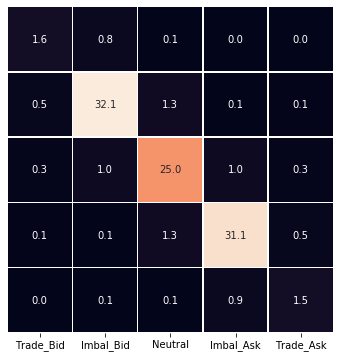

In [52]:
AVG_IMBAL_PRIOR = cme.avg_perc_mat(PRIOR_IMBAL_STATS, pd.to_datetime(PRIOR_CDATES['Date']))
plt.figure(figsize=(9, 6))
sns.heatmap(AVG_IMBAL_PRIOR.iloc[:-1].drop(columns=['Total Cols']),\
    annot=True, fmt=".1f",\
    linewidths=.5, square=True,\
    xticklabels=True,\
    yticklabels=False,\
    cbar=False);

In [53]:
cme.avg_perc_mat_2(PRIOR_DEPL_STATS, pd.to_datetime(PRIOR_CDATES['Date']))

same                      oppo                   Total Cols
             D C   D T  D T+F    F     D C   D T  D T+F   F             
 D C         0.01  0.00  0.03  32.65   0.01  0.01  1.48  0.18      34.38
 D T         0.00  0.01  0.17  10.50   0.00  0.00  1.98  0.72      13.39
D T+F        0.00  0.01  0.09   3.35   0.00  0.00  0.72  0.31       4.47
  F         22.96  4.36  0.00   0.02  11.38  9.01  0.00  0.02      47.76
Total Rows  22.98  4.38  0.30  46.52  11.40  9.02  4.18  1.23     100.00

In [54]:
cme.avg_perc_mat_2(AFTER_DEPL_STATS, pd.to_datetime(AFTER_CDATES['Date']))

same                     oppo                    Total Cols
             D C   D T  D T+F    F    D C    D T  D T+F   F             
 D C         0.02  0.01  0.13  28.61  0.02   0.01  0.92  1.00      30.71
 D T         0.01  0.05  0.29  13.44  0.01   0.01  1.79  1.80      17.39
D T+F        0.01  0.02  0.17   2.48  0.01   0.00  0.55  0.61       3.85
  F         22.30  6.62  0.00   0.04  8.34  10.68  0.00  0.05      48.04
Total Rows  22.34  6.69  0.60  44.58  8.38  10.70  3.26  3.46     100.00

## Charts and Regressions

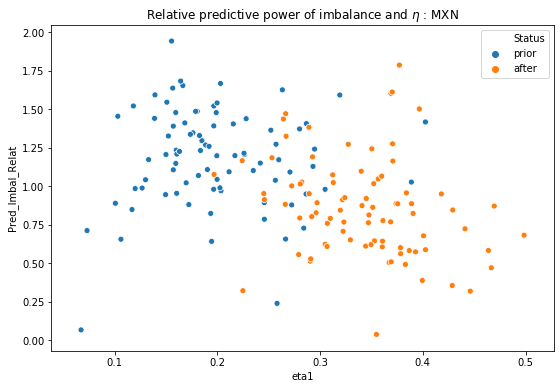

In [55]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='Pred_Imbal_Relat', hue='Status',\
           data=IMBAL_STATS_TS);
plt.title('Relative predictive power of imbalance and $\eta$ : '+CURR);

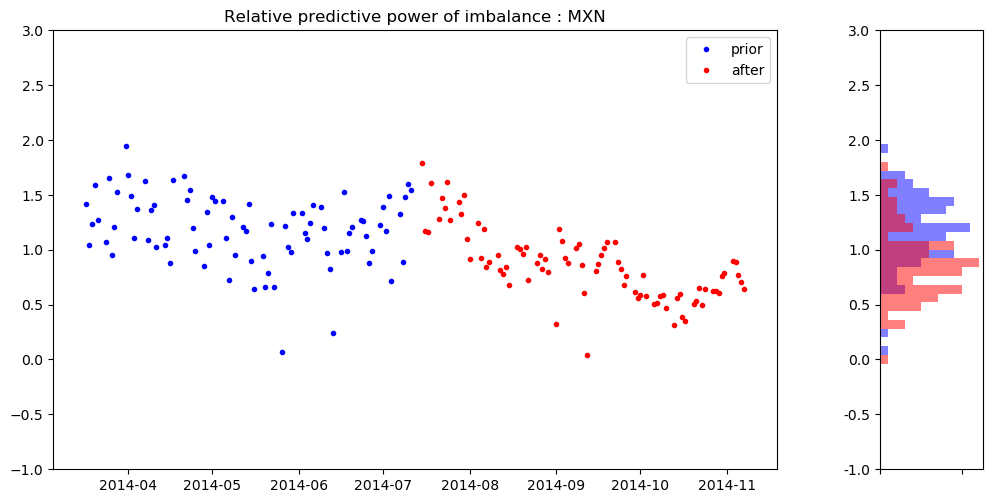

In [163]:
cme.time_series_hist_plot(IMBAL_STATS_TS, 'Pred_Imbal_Relat',\
    'Relative predictive power of imbalance : '+CURR, -1.0, 3.0, 50)

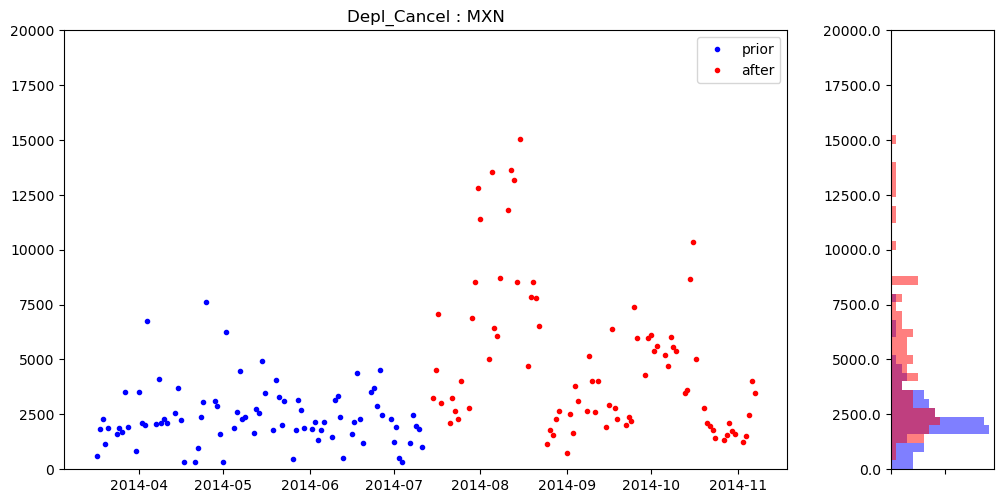

In [164]:
cme.time_series_hist_plot(ABSDEPL_STATS_TS, 'Depl_Cancel',\
    'Depl_Cancel : '+CURR, 0.0, 20000.0, 50)

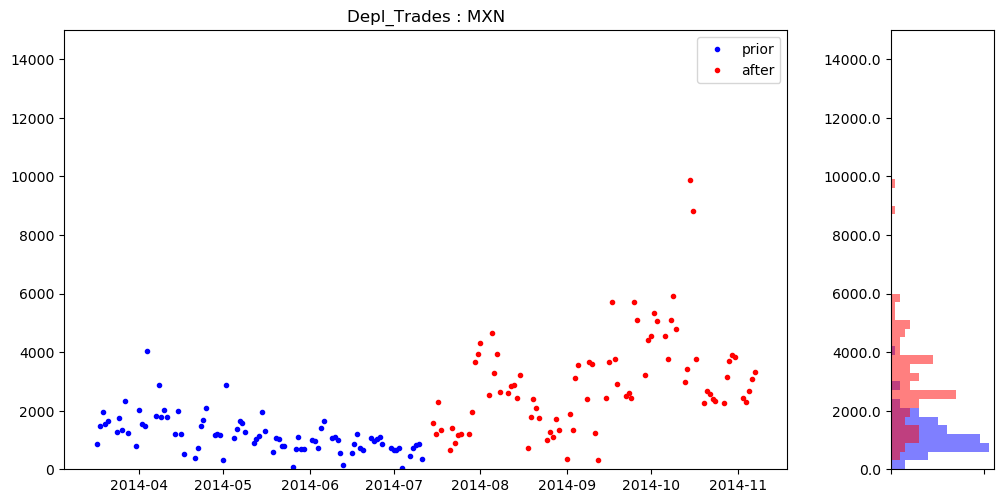

In [165]:
cme.time_series_hist_plot(ABSDEPL_STATS_TS, 'Depl_Trades',\
    'Depl_Trades : '+CURR, 0.0, 15000.0, 50)

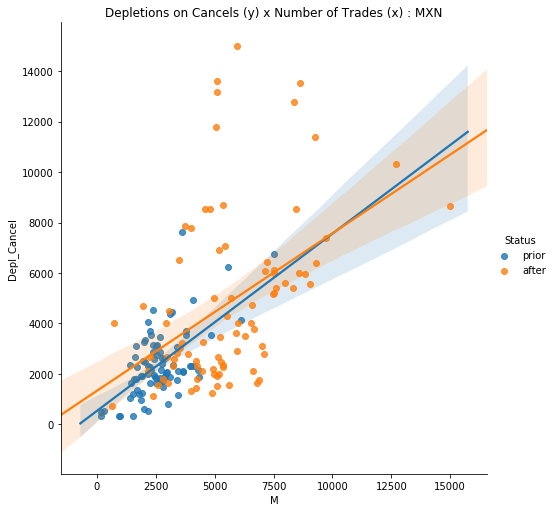

In [59]:
cme.regr_plot(ABSDEPL_STATS_TS, 'M', 'Depl_Cancel',\
    'Depletions on Cancels (y) x Number of Trades (x) : '+CURR)

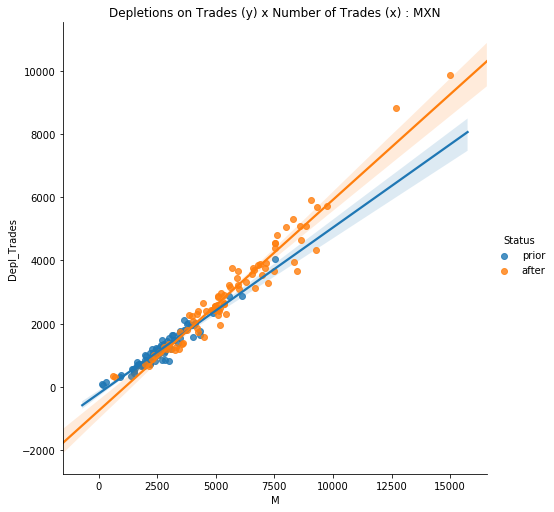

In [60]:
cme.regr_plot(ABSDEPL_STATS_TS, 'M', 'Depl_Trades',\
    'Depletions on Trades (y) x Number of Trades (x) : '+CURR)

In [61]:
cme.lin_reg(ABSDEPL_STATS_TS, ['M'], 'Depl_Cancel')

                            OLS Regression Results                            
Dep. Variable:            Depl_Cancel   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     95.54
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           4.16e-18
Time:                        17:06:28   Log-Likelihood:                -1534.2
No. Observations:                 168   AIC:                             3072.
Df Residuals:                     166   BIC:                             3079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        680.8132    345.517      1.970      0.0

/Users/marcoscscarreira/anaconda3/envs/CondaEnv36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [62]:
cme.lin_reg(ABSDEPL_STATS_TS, ['M'], 'Depl_Trades')

                            OLS Regression Results                            
Dep. Variable:            Depl_Trades   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     3568.
Date:                Wed, 09 Oct 2019   Prob (F-statistic):          3.79e-114
Time:                        17:06:28   Log-Likelihood:                -1209.8
No. Observations:                 168   AIC:                             2424.
Df Residuals:                     166   BIC:                             2430.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -508.8236     50.088    -10.159      0.0

In [63]:
cme.lin_reg(PRIOR_ABSDEPL_STATS_TS, ['M'], 'Depl_Trades')

                            OLS Regression Results                            
Dep. Variable:            Depl_Trades   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1066.
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           9.37e-49
Time:                        17:06:28   Log-Likelihood:                -551.08
No. Observations:                  84   AIC:                             1106.
Df Residuals:                      82   BIC:                             1111.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -208.8841     46.557     -4.487      0.0

In [64]:
cme.lin_reg(AFTER_ABSDEPL_STATS_TS, ['M'], 'Depl_Trades')

                            OLS Regression Results                            
Dep. Variable:            Depl_Trades   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     1340.
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           1.44e-52
Time:                        17:06:28   Log-Likelihood:                -621.60
No. Observations:                  84   AIC:                             1247.
Df Residuals:                      82   BIC:                             1252.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -749.3499    110.737     -6.767      0.0

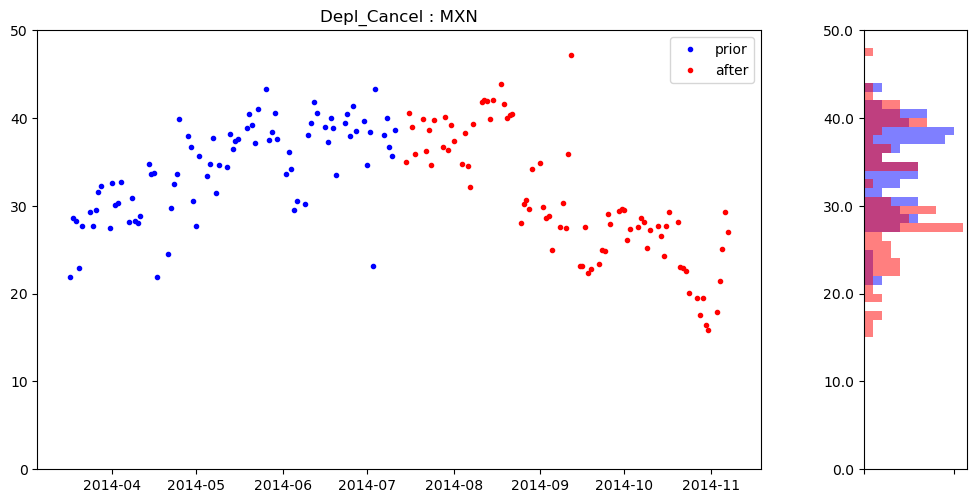

In [167]:
cme.time_series_hist_plot(DEPL_STATS_TS, 'Depl_Cancel',\
    'Depl_Cancel : '+CURR, 0, 50, 50)

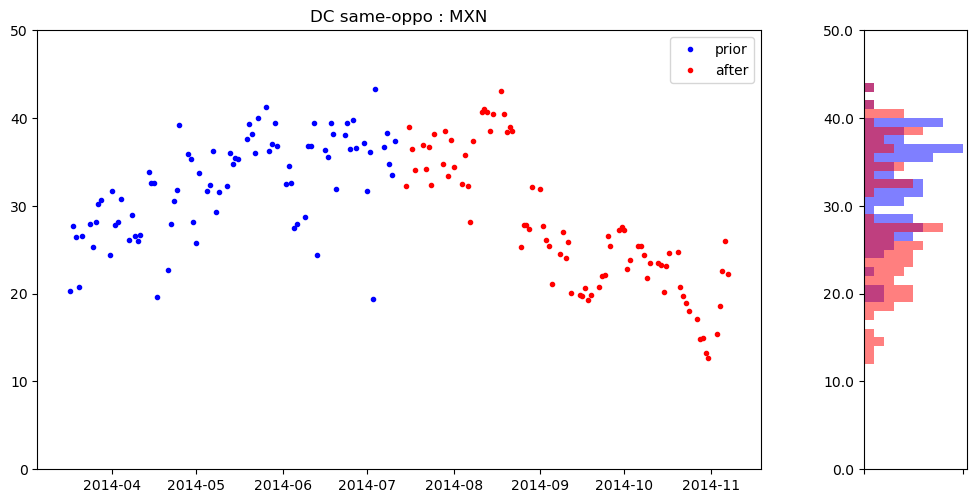

In [168]:
cme.time_series_hist_plot(DEPL_STATS_TS, 'DC same-oppo',\
    'DC same-oppo : '+CURR, 0, 50, 50)

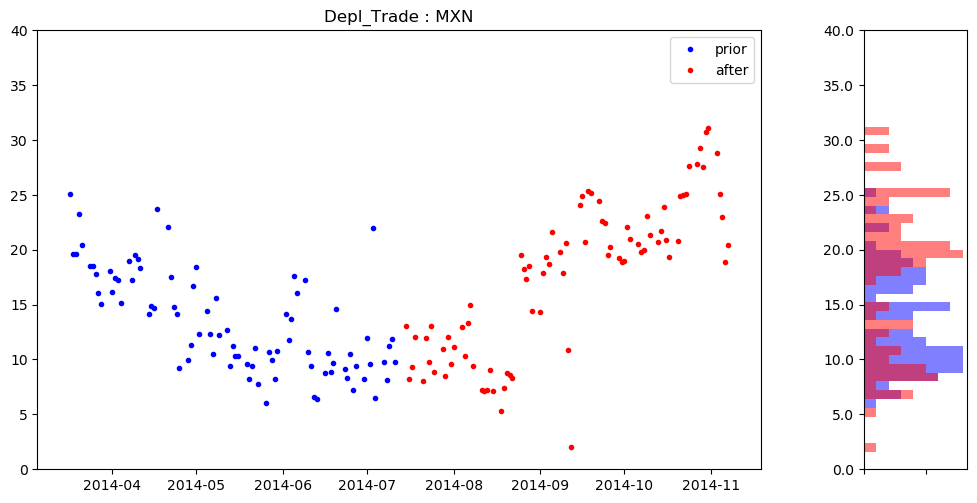

In [67]:
cme.time_series_hist_plot(DEPL_STATS_TS, 'Depl_Trade',\
    'Depl_Trade : '+CURR, 0, 40, 50)

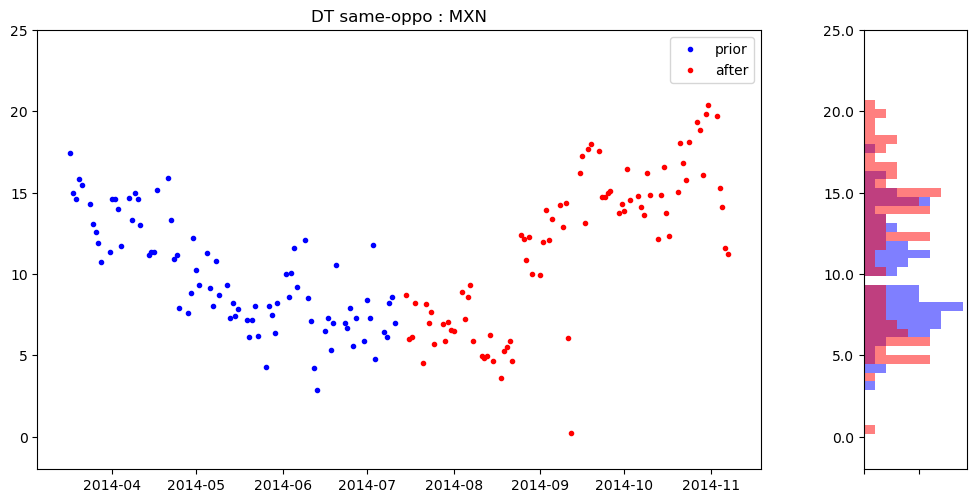

In [170]:
cme.time_series_hist_plot(DEPL_STATS_TS, 'DT same-oppo',\
    'DT same-oppo : '+CURR, -2, 25, 50)

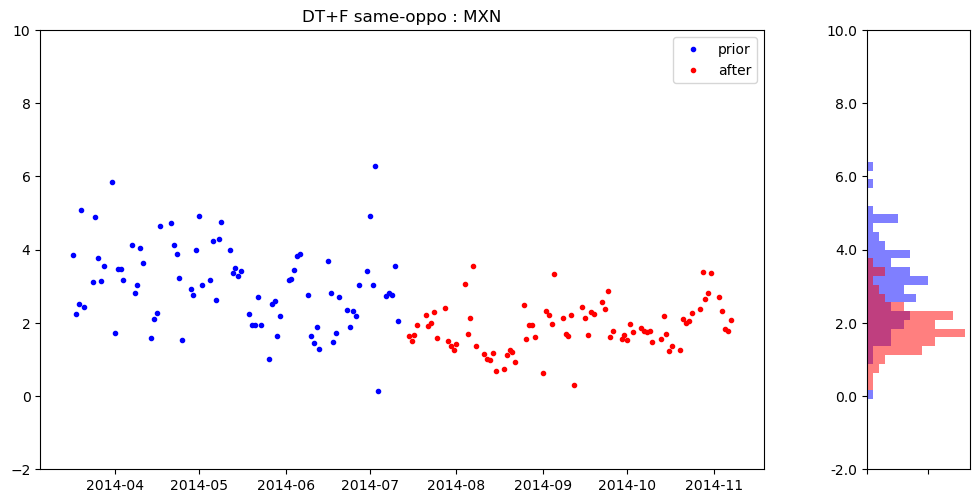

In [172]:
cme.time_series_hist_plot(DEPL_STATS_TS, 'DT+F same-oppo',\
    'DT+F same-oppo : '+CURR, -2, 10, 50)

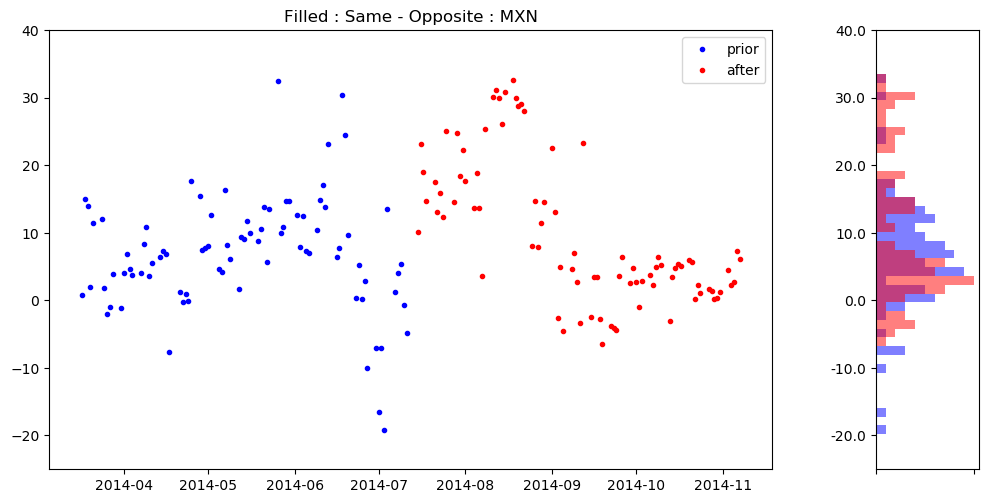

In [175]:
cme.time_series_hist_plot(DEPL_STATS_TS, 'Fill same-oppo',\
    'Filled : Same - Opposite : '+CURR, -25, 40, 50)

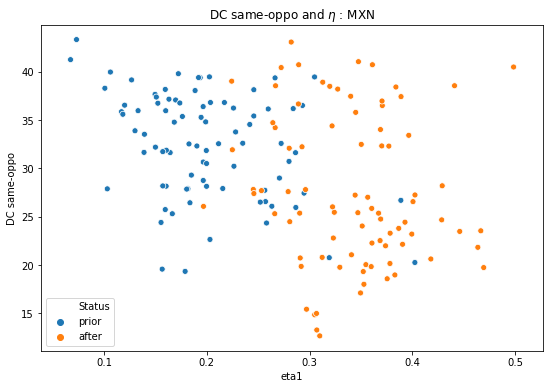

In [71]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='DC same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('DC same-oppo and $\eta$ : '+CURR);

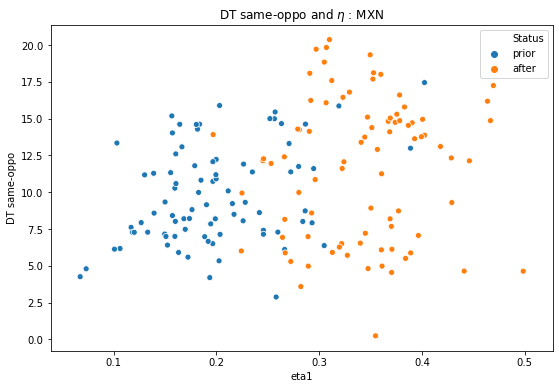

In [72]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='DT same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('DT same-oppo and $\eta$ : '+CURR);

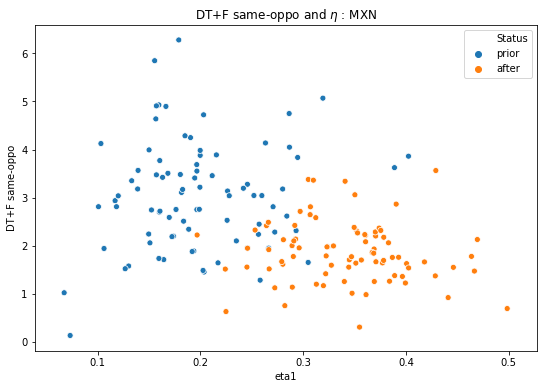

In [73]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='DT+F same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('DT+F same-oppo and $\eta$ : '+CURR);

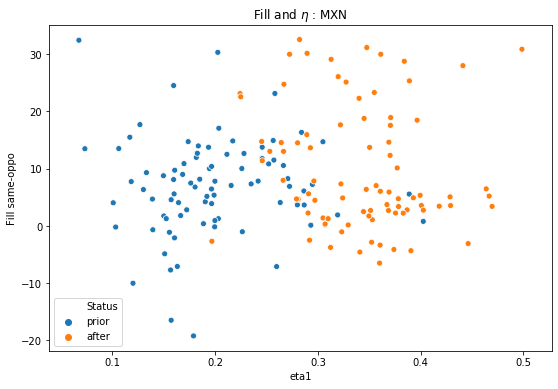

In [74]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='Fill same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('Fill and $\eta$ : '+CURR);

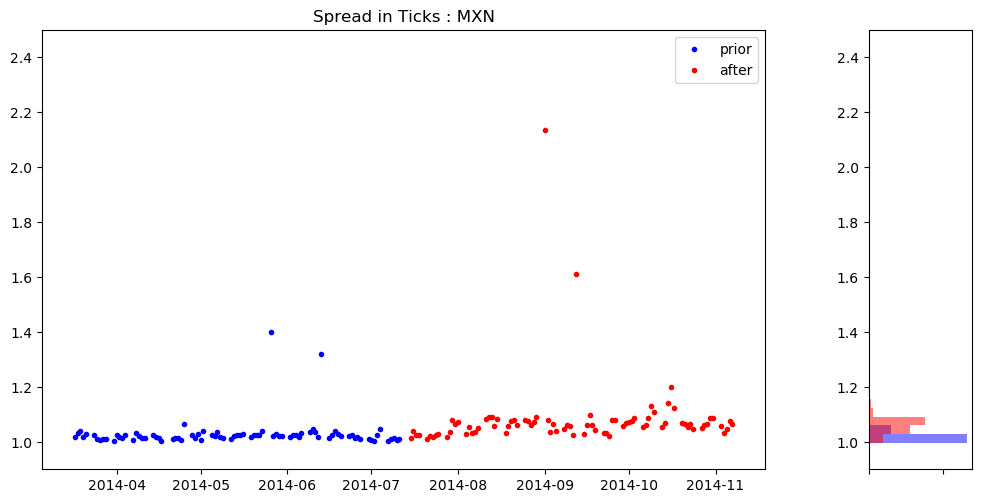

In [178]:
cme.time_series_hist_plot(OB_UZ_STATS, 'twspr1',\
    'Spread in Ticks : '+CURR, 0.9, 2.5, 50)

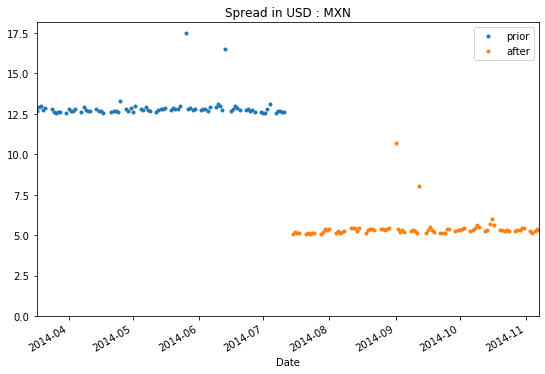

In [76]:
cme.twspr_plot_USD(OB_UZ_STATS, CURR)

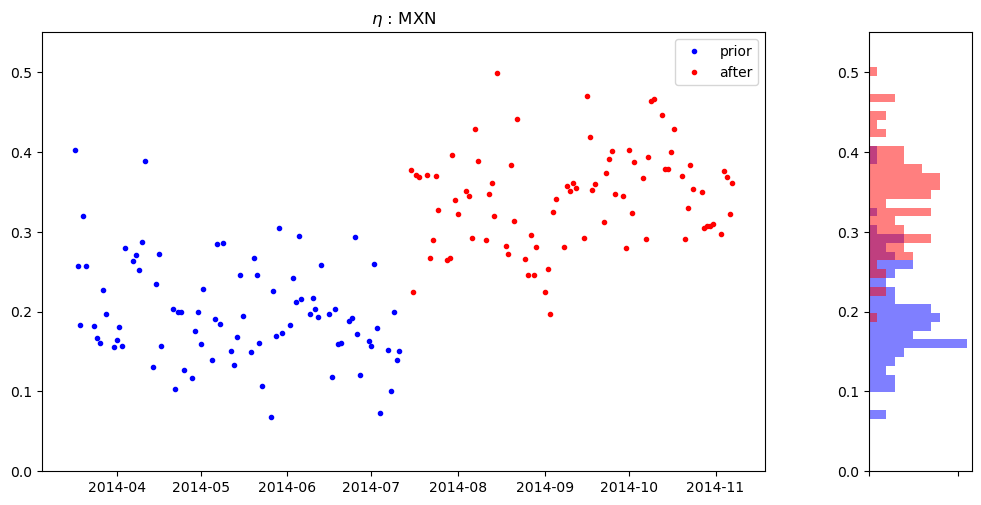

In [179]:
cme.time_series_hist_plot(OB_UZ_STATS, 'eta1',\
    '$\eta$ : '+CURR, 0, 0.55, 50)

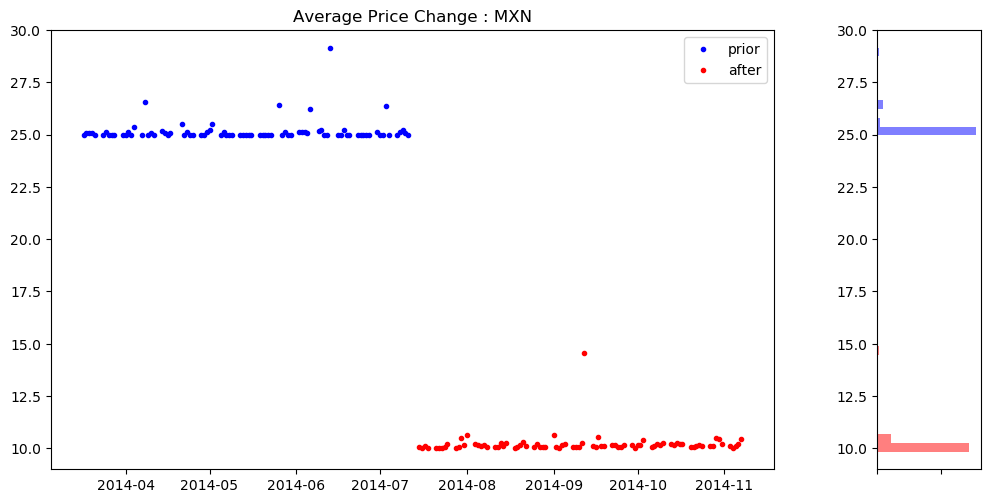

In [184]:
cme.time_series_hist_plot(OB_UZ_STATS, 'chgavg',\
    'Average Price Change : '+CURR, 9, 30, 50)

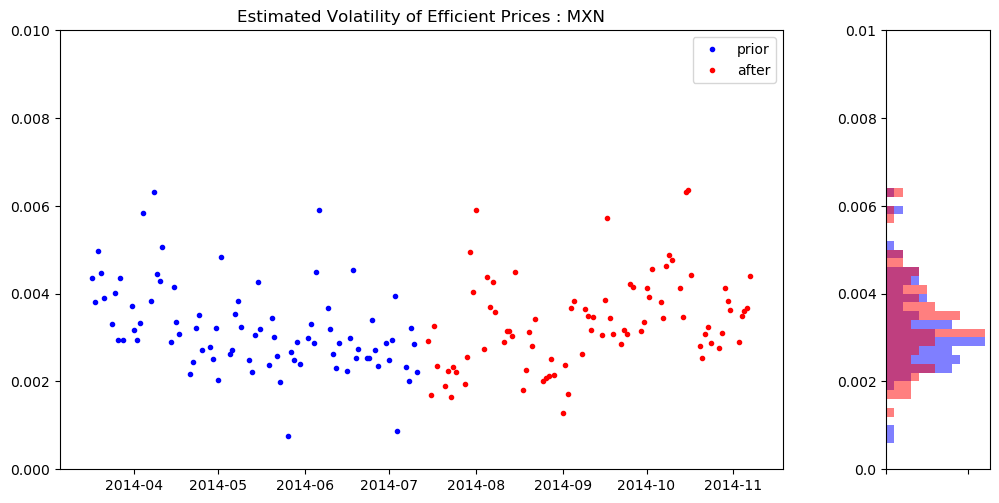

In [186]:
cme.time_series_hist_plot(OB_UZ_STATS, 'rvxe',\
    'Estimated Volatility of Efficient Prices : '+CURR, 0, 0.010, 50)

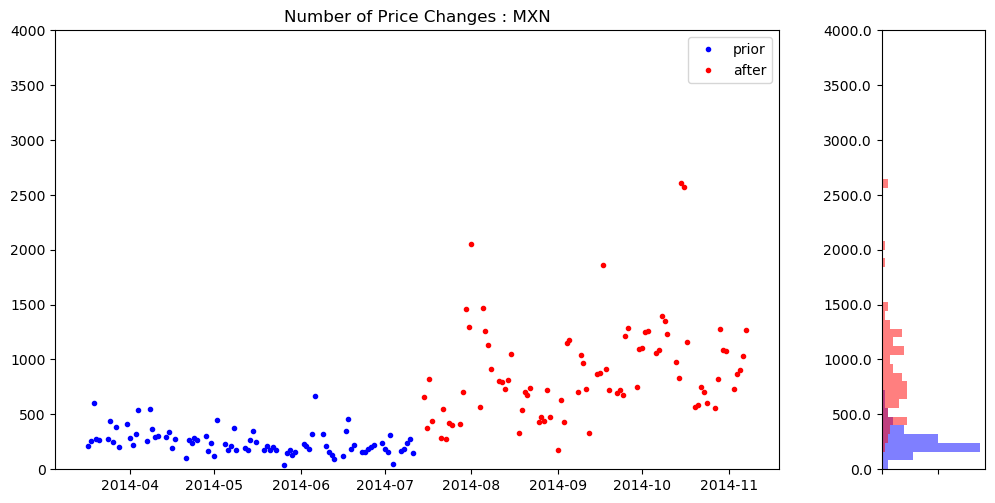

In [187]:
cme.time_series_hist_plot(OB_UZ_STATS, 'ndfpr',\
    'Number of Price Changes : '+CURR, 0, 4000, 50)

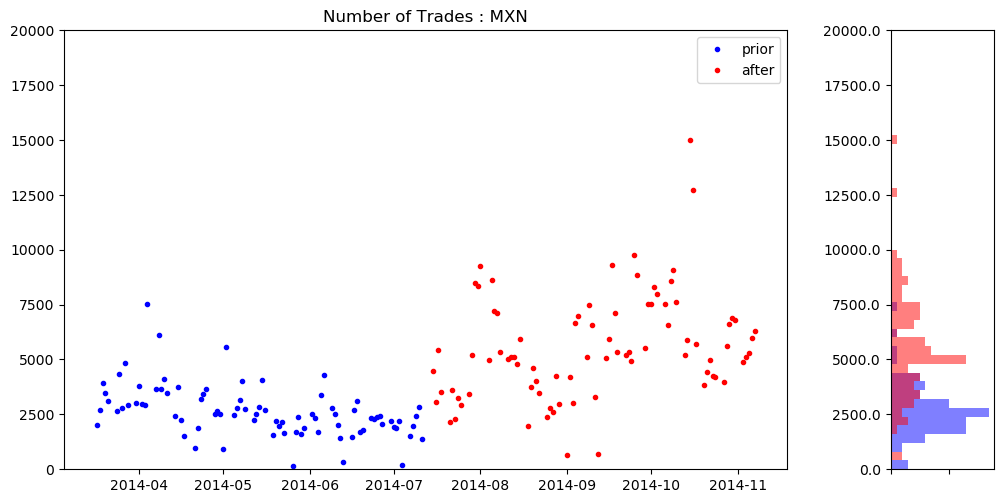

In [189]:
cme.time_series_hist_plot(OB_UZ_STATS, 'M',\
    'Number of Trades : '+CURR, 0, 20000, 50)

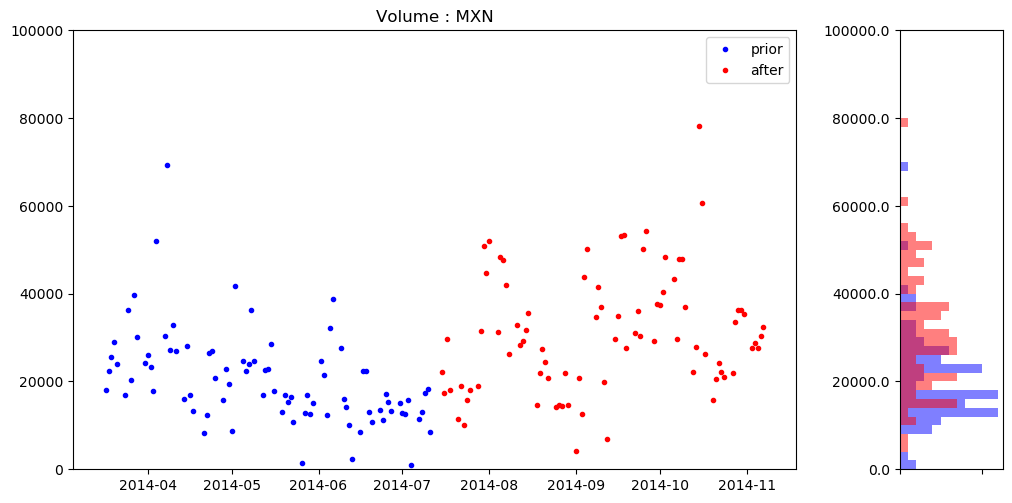

In [190]:
cme.time_series_hist_plot(OB_UZ_STATS, 'Volume',\
    'Volume : '+CURR, 0, 100000, 50)

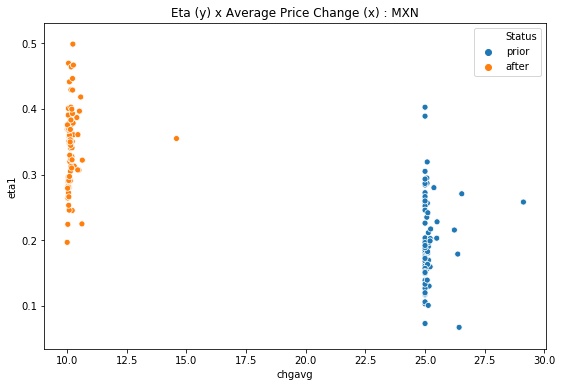

In [83]:
cme.scatter_plot(OB_UZ_STATS, 'chgavg', 'eta1',\
    'Eta (y) x Average Price Change (x) : '+CURR)

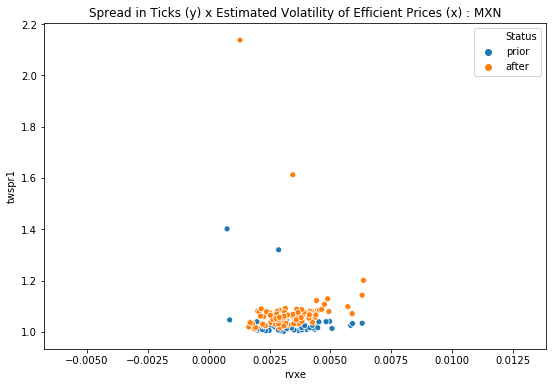

In [84]:
cme.scatter_plot(OB_UZ_STATS, 'rvxe', 'twspr1',\
    'Spread in Ticks (y) x Estimated Volatility of Efficient Prices (x) : '+CURR)

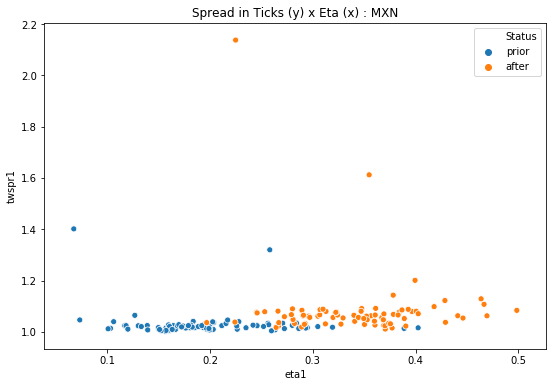

In [85]:
cme.scatter_plot(OB_UZ_STATS, 'eta1', 'twspr1',\
    'Spread in Ticks (y) x Eta (x) : '+CURR)

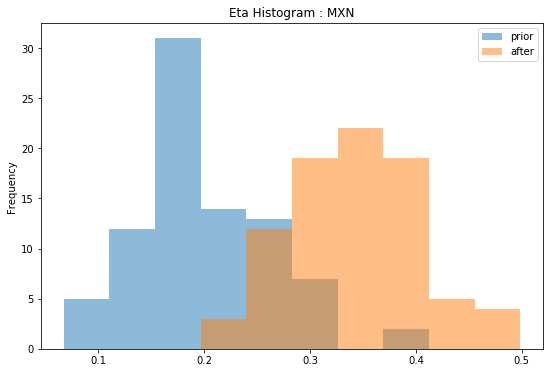

In [86]:
cme.time_series_hist(OB_UZ_STATS, 'eta1',\
    'Eta Histogram : '+CURR)

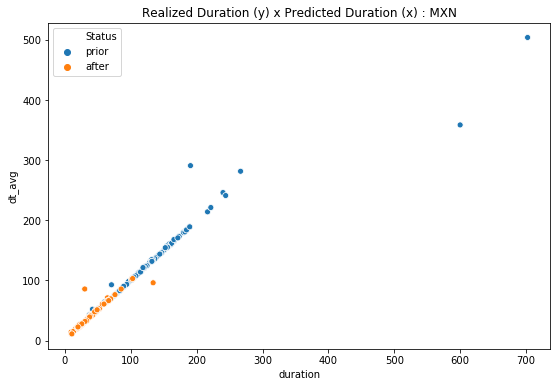

In [87]:
cme.scatter_plot(OB_UZ_STATS, 'duration', 'dt_avg',\
    'Realized Duration (y) x Predicted Duration (x) : '+CURR)

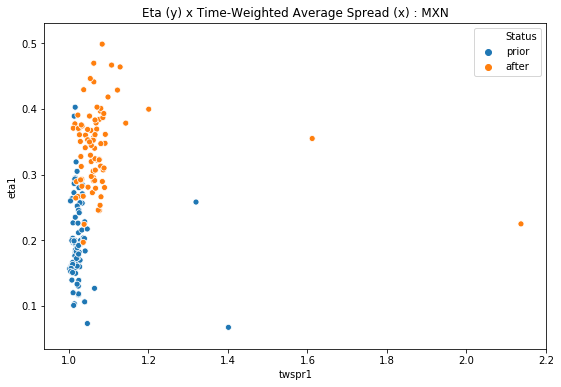

In [88]:
cme.scatter_plot(OB_UZ_STATS, 'twspr1', 'eta1',\
    'Eta (y) x Time-Weighted Average Spread (x) : '+CURR)

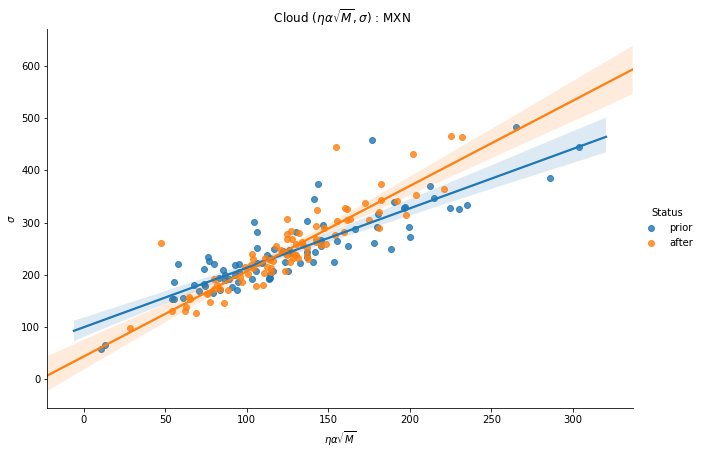

In [89]:
cme.cloud1(OB_UZ_STATS, CURR)

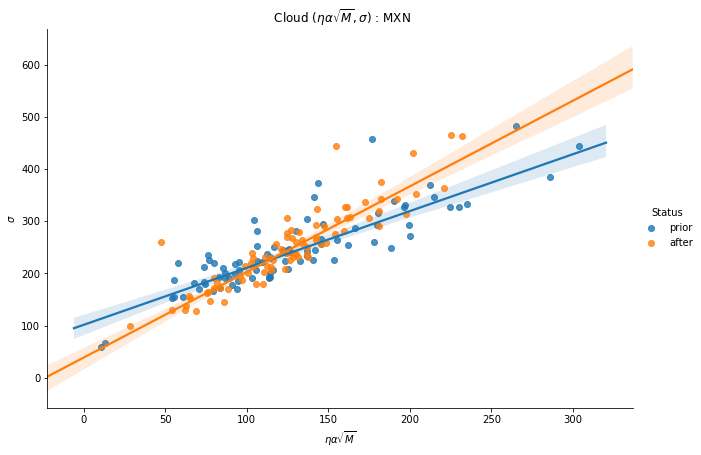

In [90]:
cme.cloud1(OB_UZ_STATS, CURR, True)

In [91]:
cme.lin_reg(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')

                            OLS Regression Results                            
Dep. Variable:                  sigma   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     177.6
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           2.44e-30
Time:                        17:06:44   Log-Likelihood:                -410.15
No. Observations:                  84   AIC:                             826.3
Df Residuals:                      81   BIC:                             833.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                23.1958     16.67

In [92]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')

                    Robust linear Model Regression Results                    
Dep. Variable:                  sigma   No. Observations:                   84
Model:                            RLM   Df Residuals:                       81
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        17:06:44                                         
No. Iterations:                    12                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                26.9172     11.83

In [93]:
cme.lin_reg(AFTER_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')

                            OLS Regression Results                            
Dep. Variable:                  sigma   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     239.3
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           1.01e-34
Time:                        17:06:44   Log-Likelihood:                -400.99
No. Observations:                  84   AIC:                             808.0
Df Residuals:                      81   BIC:                             815.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -11.2804     15.23

In [94]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')

                    Robust linear Model Regression Results                    
Dep. Variable:                  sigma   No. Observations:                   84
Model:                            RLM   Df Residuals:                       81
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        17:06:44                                         
No. Iterations:                    11                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -19.3702      9.61

In [95]:
OB_UZ_STATS['p1*eta*alpha*sqrt(M)'] = np.where(OB_UZ_STATS['Status']=='prior',\
    cme.lin_reg_params(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['eta*alpha*sqrt(M)'],\
    cme.lin_reg_params(AFTER_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['eta*alpha*sqrt(M)'])\
    *OB_UZ_STATS['eta*alpha*sqrt(M)']
OB_UZ_STATS['sigma-p2*S*sqrt(M)'] = OB_UZ_STATS['sigma']-\
    np.where(OB_UZ_STATS['Status']=='prior',\
    cme.lin_reg_params(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['S*sqrt(M)'],\
    cme.lin_reg_params(AFTER_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['S*sqrt(M)'])*\
    OB_UZ_STATS['S*sqrt(M)']

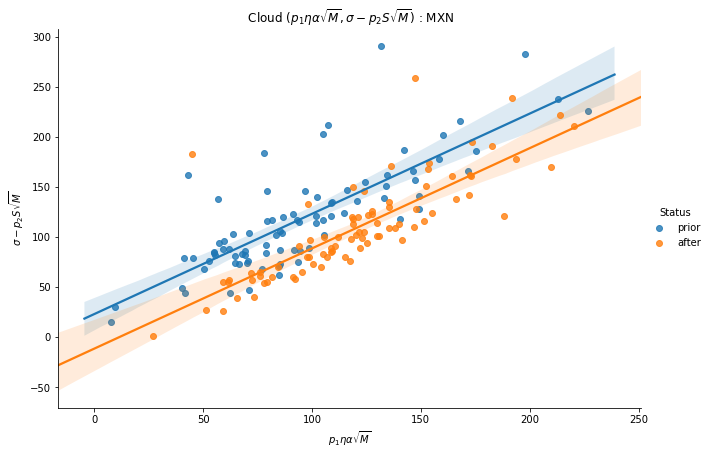

In [96]:
cme.cloud2(OB_UZ_STATS, CURR)

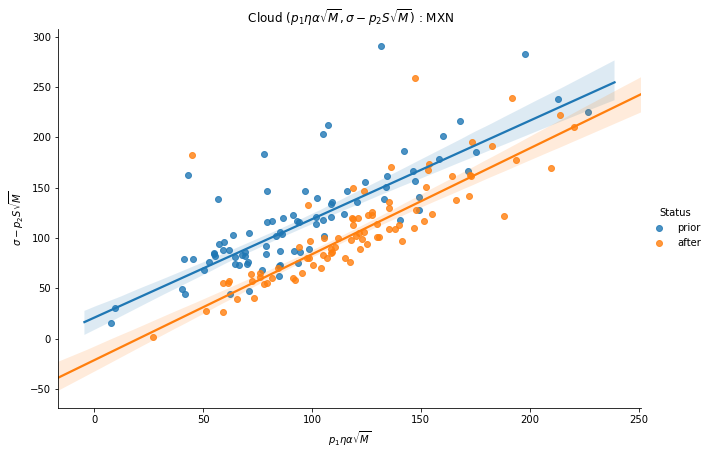

In [97]:
cme.cloud2(OB_UZ_STATS, CURR, True)

In [98]:
cme.lin_reg(OB_UZ_STATS[OB_UZ_STATS['Status']=='prior'], ['p1*eta*alpha*sqrt(M)'], 'sigma-p2*S*sqrt(M)')

                            OLS Regression Results                            
Dep. Variable:     sigma-p2*S*sqrt(M)   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     141.7
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           1.47e-19
Time:                        17:06:52   Log-Likelihood:                -410.15
No. Observations:                  84   AIC:                             824.3
Df Residuals:                      82   BIC:                             829.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   23.1958 

In [99]:
cme.lin_reg_rob(OB_UZ_STATS[OB_UZ_STATS['Status']=='prior'], ['p1*eta*alpha*sqrt(M)'], 'sigma-p2*S*sqrt(M)')

                    Robust linear Model Regression Results                    
Dep. Variable:     sigma-p2*S*sqrt(M)   No. Observations:                   84
Model:                            RLM   Df Residuals:                       82
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        17:06:52                                         
No. Iterations:                    13                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   20.8415 

In [100]:
cme.lin_reg(OB_UZ_STATS[OB_UZ_STATS['Status']=='after'], ['p1*eta*alpha*sqrt(M)'], 'sigma-p2*S*sqrt(M)')

                            OLS Regression Results                            
Dep. Variable:     sigma-p2*S*sqrt(M)   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     156.2
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           1.11e-20
Time:                        17:06:52   Log-Likelihood:                -400.99
No. Observations:                  84   AIC:                             806.0
Df Residuals:                      82   BIC:                             810.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -11.2804 

In [101]:
cme.lin_reg_rob(OB_UZ_STATS[OB_UZ_STATS['Status']=='after'], ['p1*eta*alpha*sqrt(M)'], 'sigma-p2*S*sqrt(M)')

                    Robust linear Model Regression Results                    
Dep. Variable:     sigma-p2*S*sqrt(M)   No. Observations:                   84
Model:                            RLM   Df Residuals:                       82
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        17:06:52                                         
No. Iterations:                    13                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -21.3722 

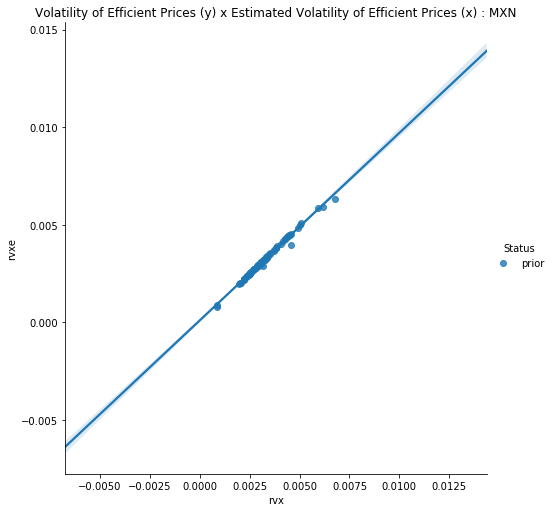

In [102]:
cme.regr_plot(PRIOR_OB_UZ_STATS, 'rvx', 'rvxe',\
    'Volatility of Efficient Prices (y) x Estimated Volatility of Efficient Prices (x) : '+CURR)

In [103]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'rvx', 'rvxe', True)

                            OLS Regression Results                            
Dep. Variable:                   rvxe   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.354e+04
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           8.08e-93
Time:                        17:06:53   Log-Likelihood:                 188.88
No. Observations:                  84   AIC:                            -373.8
Df Residuals:                      82   BIC:                            -368.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0183      0.050      0.366      0.7

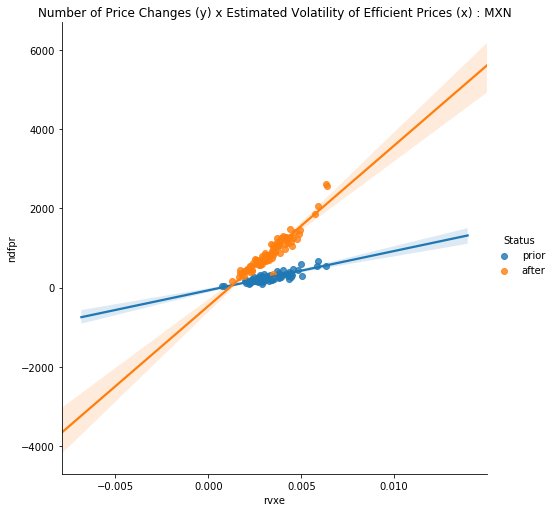

In [104]:
cme.regr_plot(OB_UZ_STATS, 'rvxe', 'ndfpr',\
    'Number of Price Changes (y) x Estimated Volatility of Efficient Prices (x) : '+CURR)

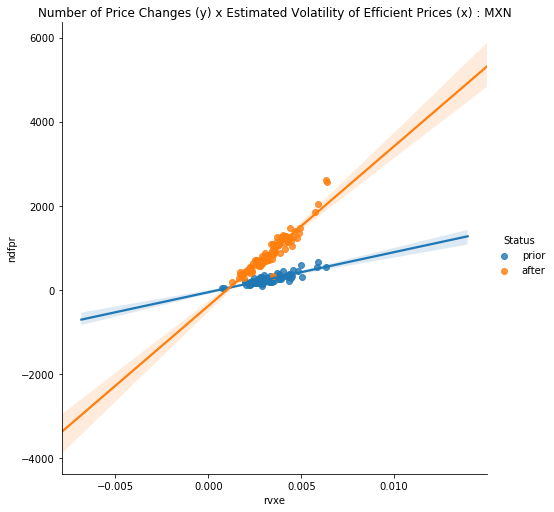

In [105]:
cme.regr_plot(OB_UZ_STATS, 'rvxe', 'ndfpr',\
    'Number of Price Changes (y) x Estimated Volatility of Efficient Prices (x) : '+CURR, True)

In [106]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'rvxe', 'ndfpr', True)

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     260.8
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           3.42e-27
Time:                        17:07:00   Log-Likelihood:                 4.3279
No. Observations:                  84   AIC:                            -4.656
Df Residuals:                      82   BIC:                            0.2058
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6313      0.447     28.238      0.0

In [107]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'rvxe', 'ndfpr', True)

                    Robust linear Model Regression Results                    
Dep. Variable:                  ndfpr   No. Observations:                   84
Model:                            RLM   Df Residuals:                       82
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        17:07:00                                         
No. Iterations:                    16                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6699      0.468     27.090      0.0

In [108]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'rvxe', 'ndfpr', True)

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     632.2
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           2.69e-40
Time:                        17:07:00   Log-Likelihood:                 31.903
No. Observations:                  84   AIC:                            -59.81
Df Residuals:                      82   BIC:                            -54.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0767      0.335     45.072      0.0

In [109]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'rvxe', 'ndfpr', True)

                    Robust linear Model Regression Results                    
Dep. Variable:                  ndfpr   No. Observations:                   84
Model:                            RLM   Df Residuals:                       82
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        17:07:00                                         
No. Iterations:                    13                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1552      0.265     57.165      0.0

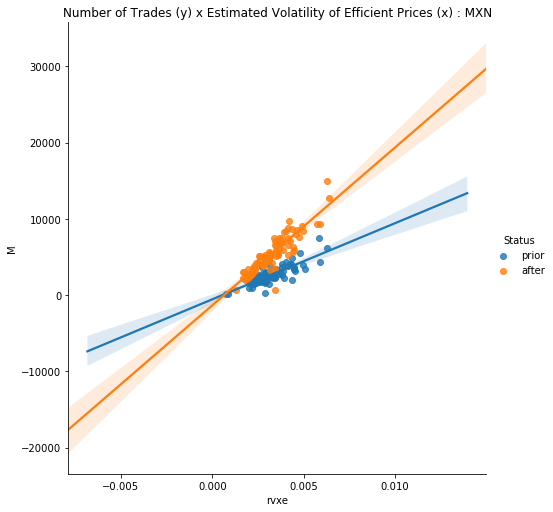

In [110]:
cme.regr_plot(OB_UZ_STATS, 'rvxe', 'M',\
    'Number of Trades (y) x Estimated Volatility of Efficient Prices (x) : '+CURR)

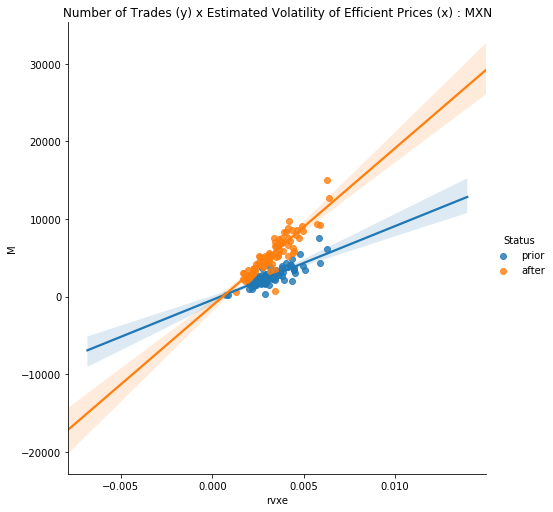

In [111]:
cme.regr_plot(OB_UZ_STATS, 'rvxe', 'M',\
    'Number of Trades (y) x Estimated Volatility of Efficient Prices (x) : '+CURR, True)

In [112]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'rvxe', 'M', True)

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     181.1
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           1.83e-22
Time:                        17:07:06   Log-Likelihood:                -26.197
No. Observations:                  84   AIC:                             56.39
Df Residuals:                      82   BIC:                             61.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.3983      0.643     25.489      0.0

In [113]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'rvxe', 'M', True)

                    Robust linear Model Regression Results                    
Dep. Variable:                      M   No. Observations:                   84
Model:                            RLM   Df Residuals:                       82
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        17:07:06                                         
No. Iterations:                    22                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.6809      0.484     32.383      0.0

In [114]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'rvxe', 'M', True)

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     157.1
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           9.51e-21
Time:                        17:07:06   Log-Likelihood:                -17.191
No. Observations:                  84   AIC:                             38.38
Df Residuals:                      82   BIC:                             43.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.0304      0.600     26.713      0.0

In [115]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'rvxe', 'M', True)

                    Robust linear Model Regression Results                    
Dep. Variable:                      M   No. Observations:                   84
Model:                            RLM   Df Residuals:                       82
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        17:07:06                                         
No. Iterations:                    19                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.7653      0.352     44.737      0.0

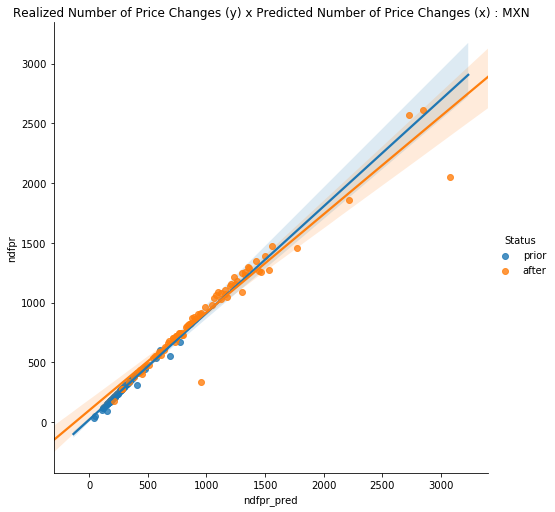

In [116]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr_pred', 'ndfpr',\
    'Realized Number of Price Changes (y) x Predicted Number of Price Changes (x) : '+CURR)

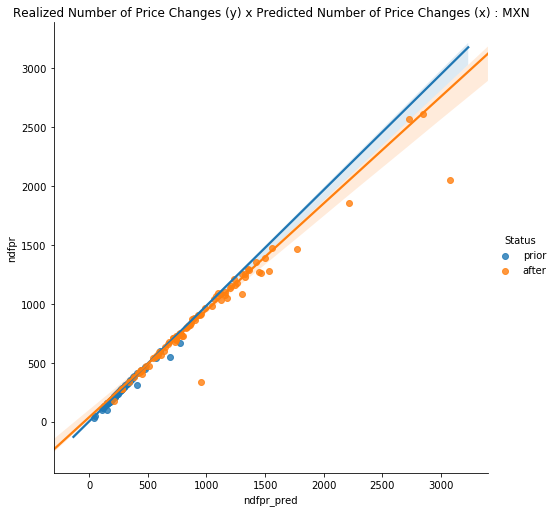

In [117]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr_pred', 'ndfpr',\
    'Realized Number of Price Changes (y) x Predicted Number of Price Changes (x) : '+CURR, True)

In [118]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     3383.
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           1.95e-68
Time:                        17:07:22   Log-Likelihood:                -359.46
No. Observations:                  84   AIC:                             722.9
Df Residuals:                      82   BIC:                             727.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.7331      4.386      4.727      0.0

In [119]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                    Robust linear Model Regression Results                    
Dep. Variable:                  ndfpr   No. Observations:                   84
Model:                            RLM   Df Residuals:                       82
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        17:07:22                                         
No. Iterations:                    25                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6557      0.639      4.154      0.0

In [120]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     1429.
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           1.18e-53
Time:                        17:07:22   Log-Likelihood:                -508.43
No. Observations:                  84   AIC:                             1021.
Df Residuals:                      82   BIC:                             1026.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.8534     23.865      4.142      0.0

In [121]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                    Robust linear Model Regression Results                    
Dep. Variable:                  ndfpr   No. Observations:                   84
Model:                            RLM   Df Residuals:                       82
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        17:07:22                                         
No. Iterations:                    22                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.0357      5.953      6.389      0.0

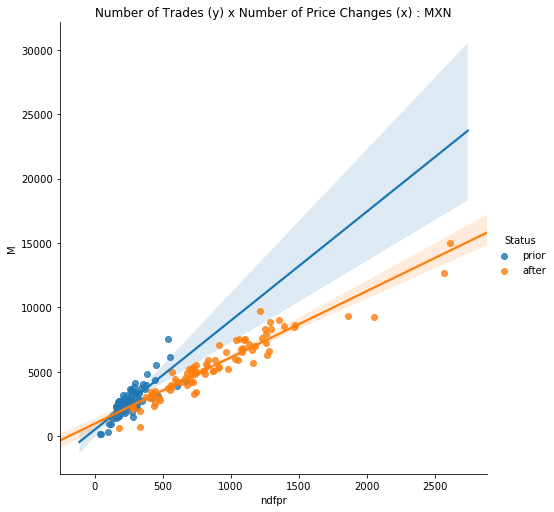

In [122]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr', 'M',\
    'Number of Trades (y) x Number of Price Changes (x) : '+CURR)

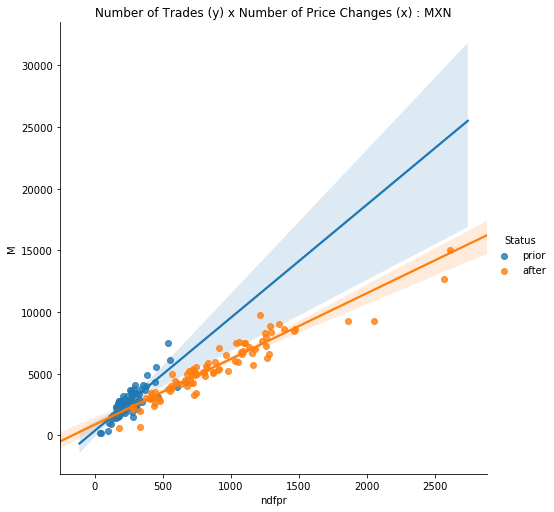

In [123]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr', 'M',\
    'Number of Trades (y) x Number of Price Changes (x) : '+CURR, True)

In [124]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'ndfpr', 'M')

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     166.8
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           1.84e-21
Time:                        17:07:29   Log-Likelihood:                -666.25
No. Observations:                  84   AIC:                             1336.
Df Residuals:                      82   BIC:                             1341.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        530.5214    179.781      2.951      0.0

In [125]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'ndfpr', 'M')

                    Robust linear Model Regression Results                    
Dep. Variable:                      M   No. Observations:                   84
Model:                            RLM   Df Residuals:                       82
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        17:07:29                                         
No. Iterations:                    13                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        385.9906    165.371      2.334      0.0

In [126]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'ndfpr', 'M')

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     709.8
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           3.90e-42
Time:                        17:07:29   Log-Likelihood:                -677.70
No. Observations:                  84   AIC:                             1359.
Df Residuals:                      82   BIC:                             1364.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        995.5011    192.119      5.182      0.0

In [127]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'ndfpr', 'M')

                    Robust linear Model Regression Results                    
Dep. Variable:                      M   No. Observations:                   84
Model:                            RLM   Df Residuals:                       82
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        17:07:29                                         
No. Iterations:                     9                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        879.7374    165.766      5.307      0.0

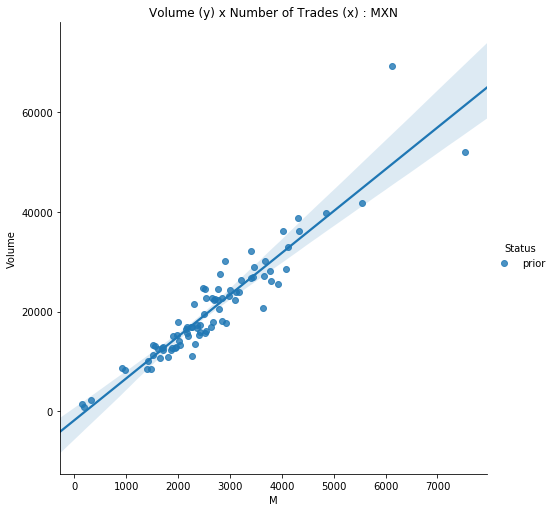

In [128]:
cme.regr_plot(PRIOR_OB_UZ_STATS, 'M', 'Volume',\
    'Volume (y) x Number of Trades (x) : '+CURR)

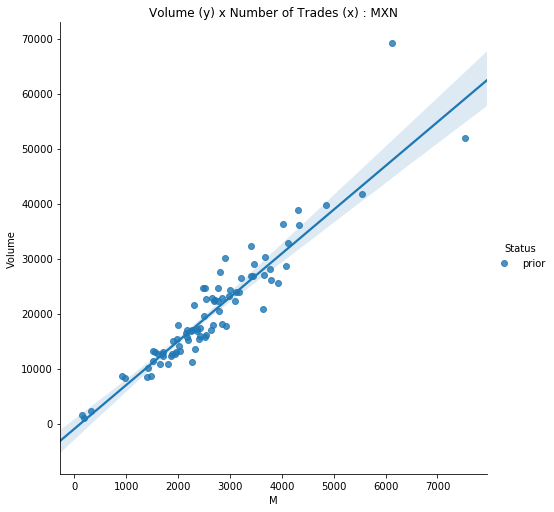

In [129]:
cme.regr_plot(PRIOR_OB_UZ_STATS, 'M', 'Volume',\
    'Volume (y) x Number of Trades (x) : '+CURR, True)

In [130]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'M', 'Volume')

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     594.2
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           2.54e-39
Time:                        17:07:32   Log-Likelihood:                -808.29
No. Observations:                  84   AIC:                             1621.
Df Residuals:                      82   BIC:                             1625.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1769.6711    994.980     -1.779      0.0

In [131]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'M', 'Volume')

                    Robust linear Model Regression Results                    
Dep. Variable:                 Volume   No. Observations:                   84
Model:                            RLM   Df Residuals:                       82
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        17:07:32                                         
No. Iterations:                     8                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -961.0500    745.022     -1.290      0.1

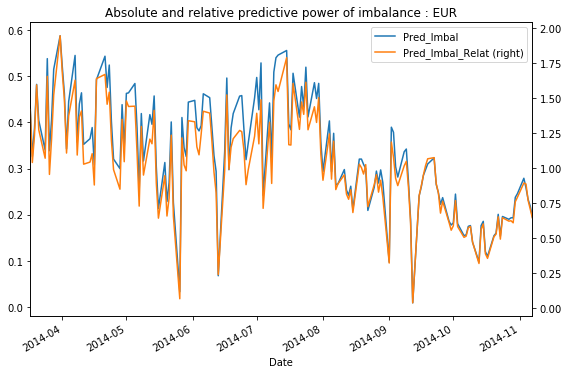

In [132]:
IMBAL_STATS_TS.drop(columns=['eta1']).plot(secondary_y=['Pred_Imbal_Relat'],\
    figsize=(9,6), title='Absolute and relative predictive power of imbalance : EUR');

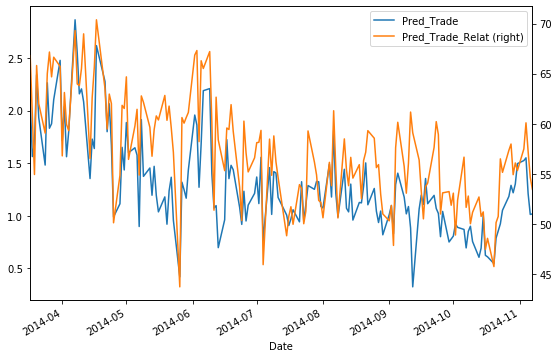

In [133]:
TRADE_STATS_TS.plot(secondary_y=['Pred_Trade_Relat'], figsize=(9,6));

In [134]:
OB_UZ_STATS_SPREADS = cme.spread_stats(OB_UZ_STATS)

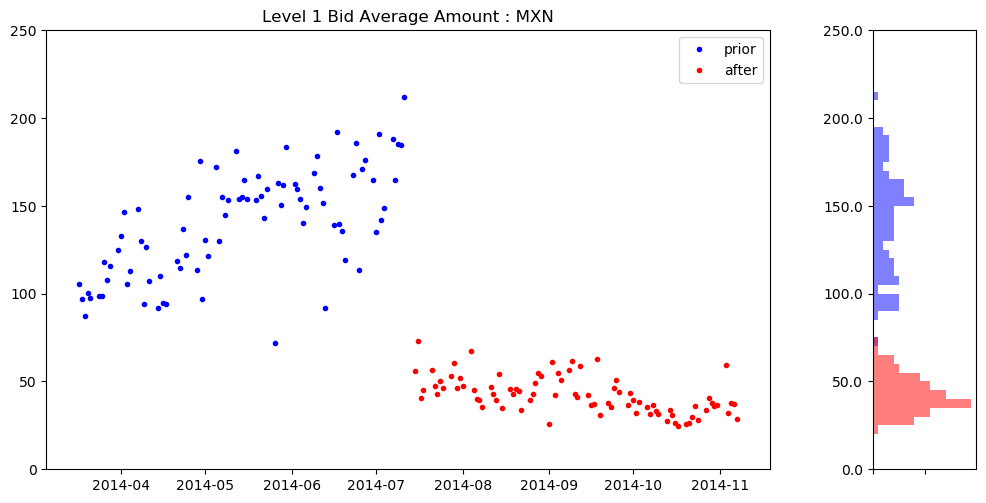

In [193]:
cme.time_series_hist_plot(OB_UZ_STATS_SPREADS, 'bid1qty',\
    'Level 1 Bid Average Amount : '+CURR, 0, 250, 50)

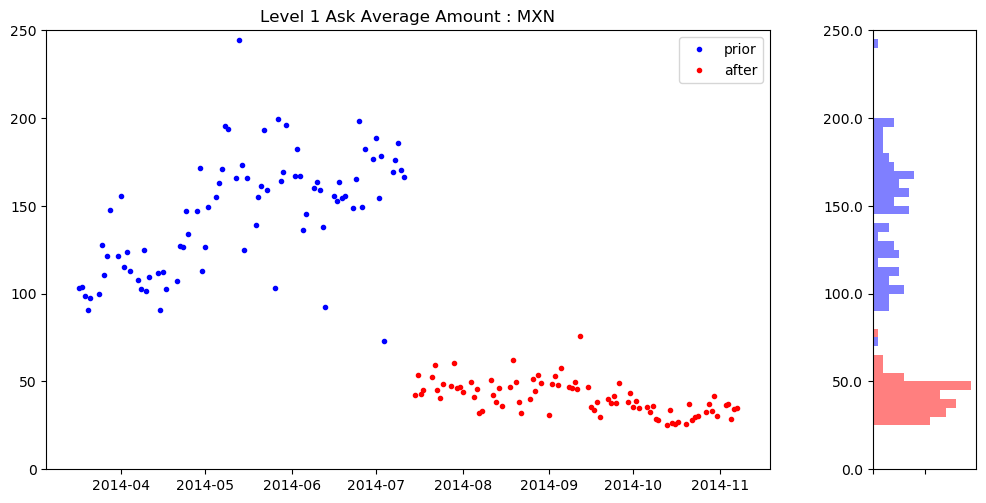

In [194]:
cme.time_series_hist_plot(OB_UZ_STATS_SPREADS, 'ask1qty',\
    'Level 1 Ask Average Amount : '+CURR, 0, 250, 50)

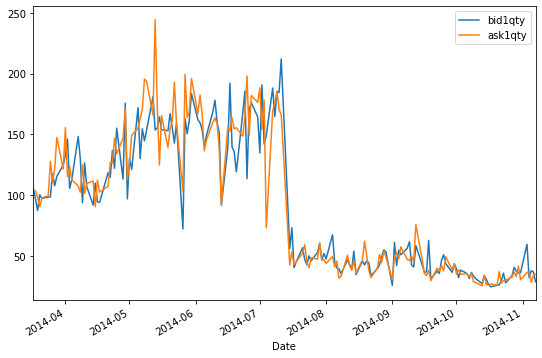

In [137]:
OB_UZ_STATS_SPREADS[['bid1qty', 'ask1qty']].plot(figsize=(9,6));

In [138]:
OB_UZ_STATS_SPREADS[OB_UZ_STATS_SPREADS['Status'] == 'prior'][['bid1qty', 'ask1qty']].mean()/\
    OB_UZ_STATS_SPREADS[OB_UZ_STATS_SPREADS['Status'] == 'after'][['bid1qty', 'ask1qty']].mean()

bid1qty    3.306712
ask1qty    3.551708
dtype: float64

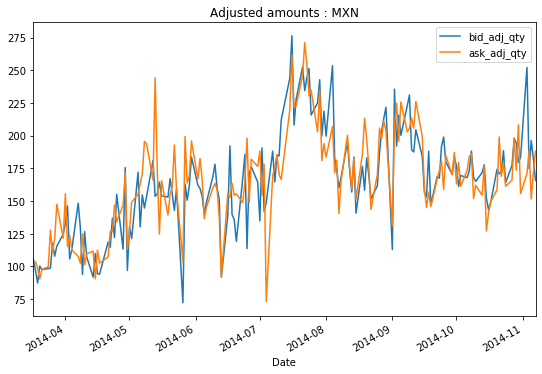

In [139]:
OB_UZ_STATS_SPREADS[['bid_adj_qty', 'ask_adj_qty']].plot(figsize=(9,6),\
    title='Adjusted amounts : '+CURR);

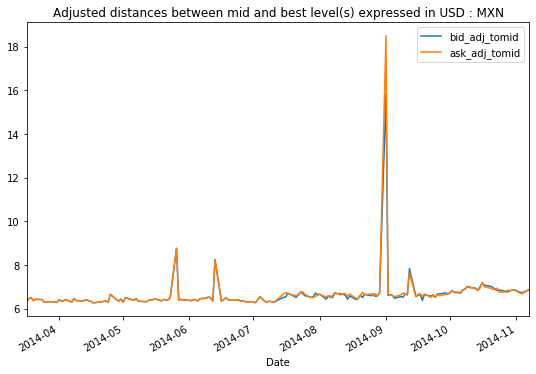

In [140]:
OB_UZ_STATS_SPREADS[['bid_adj_tomid', 'ask_adj_tomid']].plot(figsize=(9,6),\
    title='Adjusted distances between mid and best level(s) expressed in USD : '+CURR);

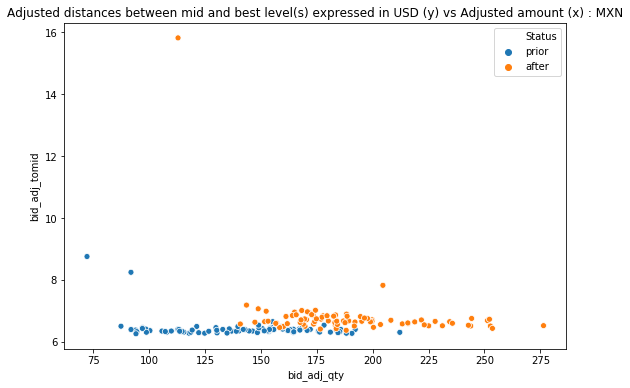

In [141]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='bid_adj_qty', y='bid_adj_tomid',\
                hue='Status', data=OB_UZ_STATS_SPREADS);
plt.title('Adjusted distances between mid and best level(s) expressed in USD (y) vs Adjusted amount (x) : '+CURR);

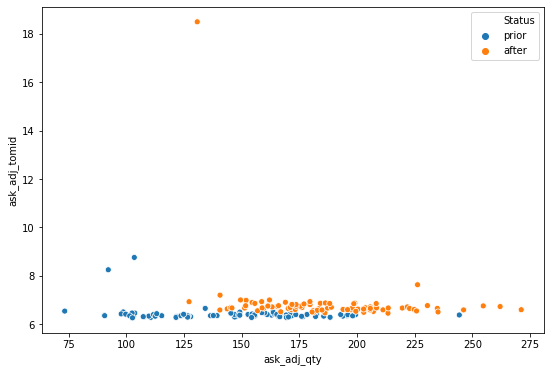

In [142]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='ask_adj_qty', y='ask_adj_tomid',\
                hue='Status', data=OB_UZ_STATS_SPREADS);

### Costs

In [143]:
PRIOR_MEAN_COST = cme.cost_mean(PRIOR_COST_STATS, 100)

In [144]:
PRIOR_MEAN_COST['Status'] = 'prior'

In [145]:
AFTER_MEAN_COST = cme.cost_mean(AFTER_COST_STATS, 100)

In [146]:
AFTER_MEAN_COST['Status'] = 'after'

In [147]:
MEAN_COST_STATS = pd.concat([PRIOR_MEAN_COST, AFTER_MEAN_COST], sort=False)

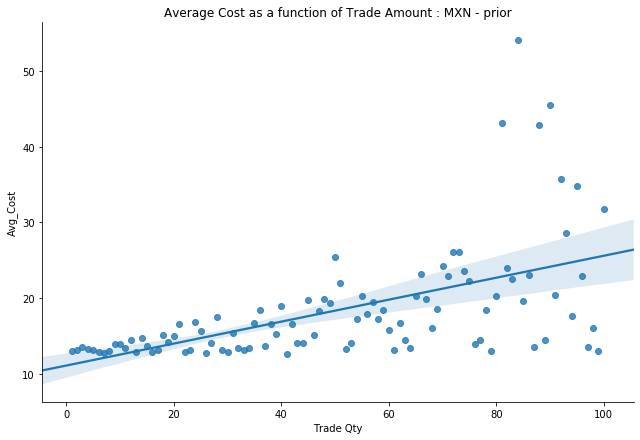

In [148]:
sns.lmplot(x='Trade Qty', y='Avg_Cost', data=PRIOR_MEAN_COST.reset_index(),\
          height=6, aspect=1.5);
plt.title('Average Cost as a function of Trade Amount : '+CURR+' - prior');

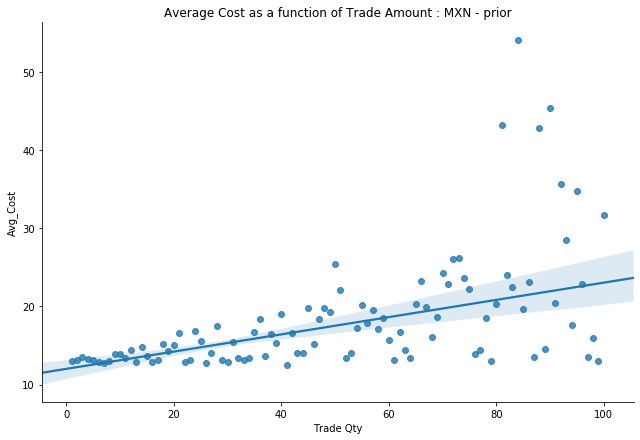

In [149]:
sns.lmplot(x='Trade Qty', y='Avg_Cost', data=PRIOR_MEAN_COST.reset_index(),\
          height=6, aspect=1.5, robust=True);
plt.title('Average Cost as a function of Trade Amount : '+CURR+' - prior');

In [150]:
cme.lin_reg(cme.cost_mean(PRIOR_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     29.67
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           1.73e-06
Time:                        17:07:42   Log-Likelihood:                -105.47
No. Observations:                  50   AIC:                             214.9
Df Residuals:                      48   BIC:                             218.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1806      0.585     20.837      0.0

In [151]:
cme.lin_reg_rob(cme.cost_mean(PRIOR_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                   50
Model:                            RLM   Df Residuals:                       48
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        17:07:42                                         
No. Iterations:                    27                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.4666      0.636     19.616      0.0

In [152]:
cme.lin_reg(cme.cost_mean(PRIOR_COST_STATS, 100).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     44.11
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           1.74e-09
Time:                        17:07:42   Log-Likelihood:                -324.97
No. Observations:                 100   AIC:                             653.9
Df Residuals:                      98   BIC:                             659.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0990      1.270      8.740      0.0

In [153]:
cme.lin_reg_rob(cme.cost_mean(PRIOR_COST_STATS, 100).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                  100
Model:                            RLM   Df Residuals:                       98
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        17:07:42                                         
No. Iterations:                    24                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0217      0.748     16.079      0.0

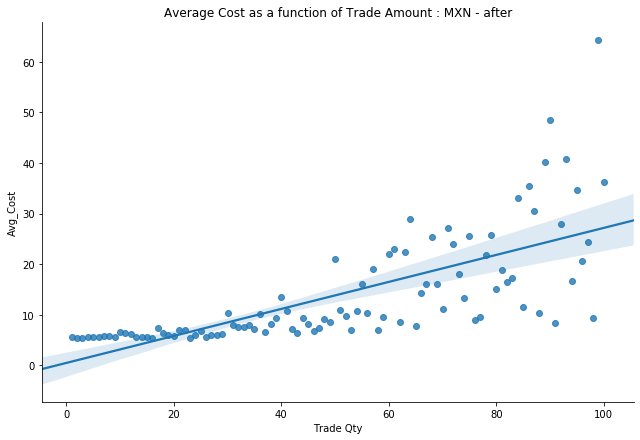

In [154]:
sns.lmplot(x='Trade Qty', y='Avg_Cost', data=AFTER_MEAN_COST.reset_index(),\
          height=6, aspect=1.5);
plt.title('Average Cost as a function of Trade Amount : '+CURR+' - after');

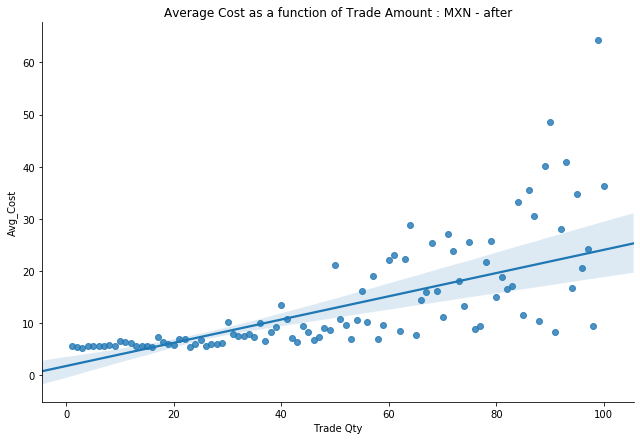

In [155]:
sns.lmplot(x='Trade Qty', y='Avg_Cost', data=AFTER_MEAN_COST.reset_index(),\
          height=6, aspect=1.5, robust=True);
plt.title('Average Cost as a function of Trade Amount : '+CURR+' - after');

In [156]:
cme.lin_reg(cme.cost_mean(AFTER_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     27.47
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           3.53e-06
Time:                        17:07:51   Log-Likelihood:                -107.16
No. Observations:                  50   AIC:                             218.3
Df Residuals:                      48   BIC:                             222.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5525      0.605      7.530      0.0

In [157]:
cme.lin_reg_rob(cme.cost_mean(AFTER_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                   50
Model:                            RLM   Df Residuals:                       48
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        17:07:51                                         
No. Iterations:                    16                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0797      0.287     17.727      0.0

In [158]:
cme.lin_reg(cme.cost_mean(AFTER_COST_STATS, 100).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     100.6
Date:                Wed, 09 Oct 2019   Prob (F-statistic):           1.05e-16
Time:                        17:07:51   Log-Likelihood:                -344.74
No. Observations:                 100   AIC:                             693.5
Df Residuals:                      98   BIC:                             698.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4940      1.548      0.319      0.7

In [159]:
cme.lin_reg_rob(cme.cost_mean(AFTER_COST_STATS, 100).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                  100
Model:                            RLM   Df Residuals:                       98
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2019                                         
Time:                        17:07:51                                         
No. Iterations:                    50                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8125      1.186      1.528      0.1

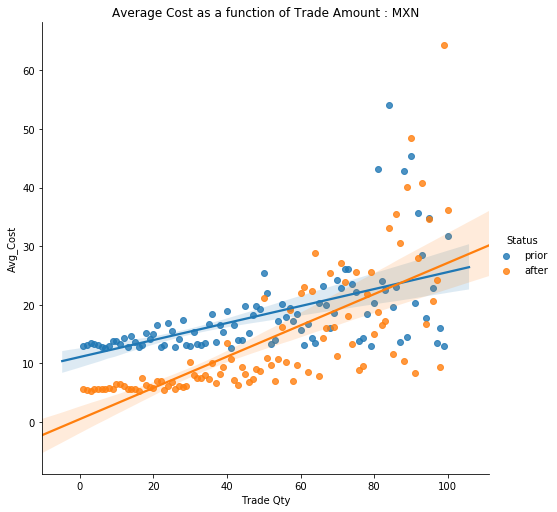

In [160]:
cme.regr_plot(MEAN_COST_STATS.reset_index(), 'Trade Qty', 'Avg_Cost',\
    'Average Cost as a function of Trade Amount : '+CURR)

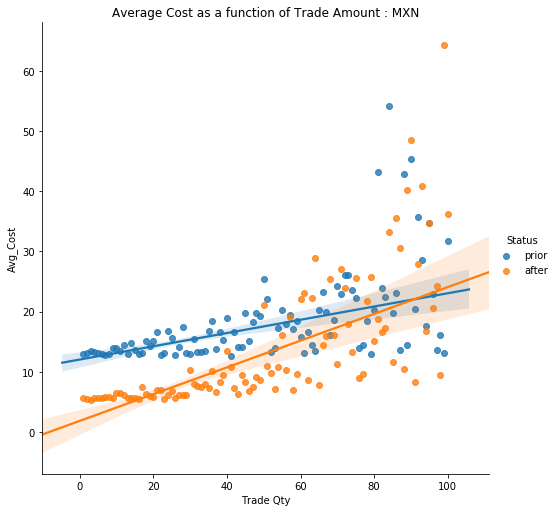

In [161]:
cme.regr_plot(MEAN_COST_STATS.reset_index(), 'Trade Qty', 'Avg_Cost',\
    'Average Cost as a function of Trade Amount : '+CURR, True)

## Eta prediction

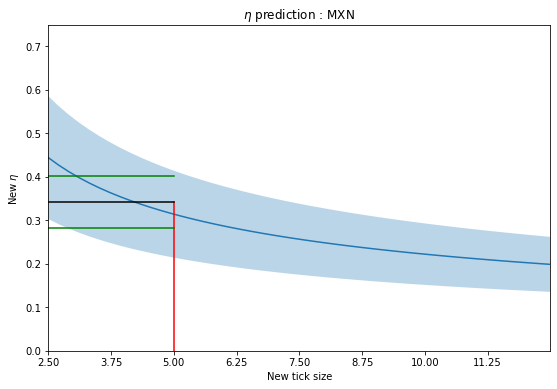

In [162]:
cme.plot_eta(TICK_PRIOR, TICK_AFTER,\
    TABLE_MATHIEU.loc['prior']['eta1'], TABLE_MATHIEU.loc['after']['eta1'],\
    TABLE_MATHIEU_ERR.loc['prior']['eta1'], TABLE_MATHIEU_ERR.loc['after']['eta1'],\
    CURR)